In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr

In [2]:
# global parameters
a = 2 # domain size over y
b = 1 # domain size over z
Q = -1 # pressure_gradient / mu; some known negative constant (P2<P1)

def velocity_single(y, z, n):
    '''
    A single item in the function expansion
    
    y, z: spatial location; np.array of the same shape
    n: integer
    
    return: velocity; np.array of the same shape as y and z
    '''
    
    gamma_n = n*np.pi/a
    q_n = 2/a*Q/gamma_n*(1-(-1)**n)
    C_n = q_n/(gamma_n**2 * np.sinh(gamma_n*b))
    
    u_n = 2*C_n * np.sinh(gamma_n/2*(z-b)) * (np.cosh(gamma_n/2*(z+b))-np.cosh(gamma_n/2*(z-b))) * np.sin(gamma_n*y)
    return u_n

def velocity(y, z, N=100):
    '''
    The full function expansion (the sum of multiple items)
    
    y, z: spatial location; np.array of the same shape
    N: integer
    
    return: velocity; np.array of the same shape as y and z
    '''
    
    u = np.zeros_like(y)
    for n in range(1, N+1):
        u += velocity_single(y, z, n)
        
    return u

In [3]:
y_1d = np.linspace(0, a, 101)
z_1d = np.linspace(0, b, 101)
y_2d, z_2d = np.meshgrid(y_1d, z_1d)

u = velocity(y_2d, z_2d)

In [4]:
dr_u = xr.DataArray(u, coords={'y': y_1d, 'z': z_1d}, dims=['y', 'z'])
dr_u

<xarray.DataArray (y: 101, z: 101)>
array([[0.000000e+00, 0.000000e+00, 0.000000e+00, ..., 0.000000e+00,
        0.000000e+00, 0.000000e+00],
       [0.000000e+00, 5.262717e-04, 9.074219e-04, ..., 9.074219e-04,
        5.262717e-04, 2.414903e-18],
       [0.000000e+00, 9.776643e-04, 1.732530e-03, ..., 1.732530e-03,
        9.776643e-04, 4.390682e-18],
       ...,
       [0.000000e+00, 9.776643e-04, 1.732530e-03, ..., 1.732530e-03,
        9.776643e-04, 4.390682e-18],
       [0.000000e+00, 5.262717e-04, 9.074219e-04, ..., 9.074219e-04,
        5.262717e-04, 2.414903e-18],
       [0.000000e+00, 0.000000e+00, 0.000000e+00, ..., 0.000000e+00,
        0.000000e+00, 0.000000e+00]])
Coordinates:
  * y        (y) float64 0.0 0.02 0.04 0.06 0.08 0.1 0.12 0.14 0.16 0.18 0.2 ...
  * z        (z) float64 0.0 0.01 0.02 0.03 0.04 0.05 0.06 0.07 0.08 0.09 ...

In [16]:
plt.rcParams['figure.figsize'] = [4.0, 2.5]

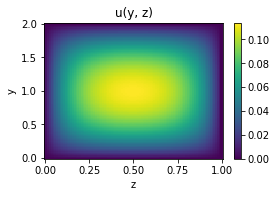

In [17]:
dr_u.plot()
plt.title('u(y, z)')
plt.savefig('u(y, z)', dpi=200)

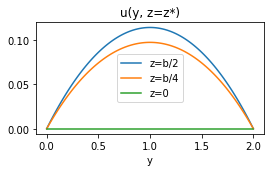

In [18]:
dr_u.sel(z=b/2).plot(label='z=b/2')
dr_u.sel(z=b/4).plot(label='z=b/4')
dr_u.sel(z=0).plot(label='z=0')

plt.legend()
plt.title('u(y, z=z*)')
plt.tight_layout()
plt.savefig('u(y)', dpi=200)

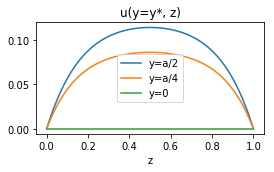

In [19]:
dr_u.sel(y=a/2).plot(label='y=a/2')
dr_u.sel(y=a/4).plot(label='y=a/4')
dr_u.sel(y=0).plot(label='y=0')

plt.legend()
plt.title('u(y=y*, z)')
plt.tight_layout()
plt.savefig('u(z)', dpi=200)

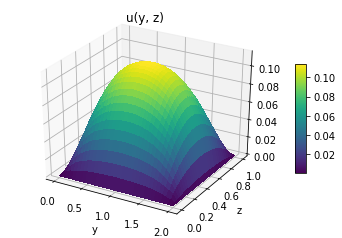

In [20]:
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=[6, 4])
ax = fig.gca(projection='3d')

# Plot the surface.
surf = ax.plot_surface(y_2d, z_2d, u, cmap='viridis', linewidth=0, antialiased=False)
ax.set_xlabel('y')
ax.set_ylabel('z')
ax.set_title('u(y, z)')

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=10)
fig.savefig('surface_plot.png', dpi=200)